# Plotting vector on a map

We will explain how to plot a vector field on a map.<br/>
The data will consist of surface currents measured by high-frequency radar managed by [Puertos del Estado](http://puertos.es/).

In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
%matplotlib inline

We set the font size to 20 points and the font to Times New Roman.

In [2]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

# Setting up the map

The map use a [Mercator](http://matplotlib.org/basemap/users/merc.html) projection centered on southern Spain.<br/>
We add the coastline, fill the continents and label the meridians/parallels.<br/>
The resolution is set as *low* for the first tries. 

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


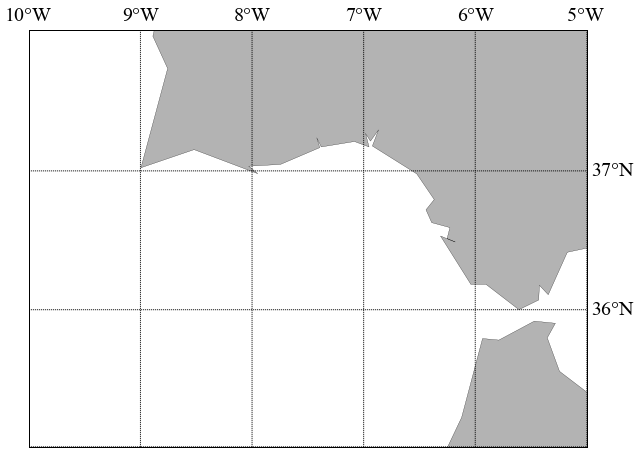

In [3]:
m = Basemap(projection='merc', llcrnrlat=35., urcrnrlat=38.,\
            llcrnrlon=-10., urcrnrlon=-5., lat_ts=35., resolution='l')
plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=.25)
m.fillcontinents(color='.7')
m.drawparallels(np.arange(30.,40.,1.), labels=[False,True,True,False])
m.drawmeridians(np.arange(-10.,2.,1.), labels=[False,True,True,False])
plt.show()

# Adding a 2D vector field to the map

We will use HF radar data from Puertos del Estado. The data cover the Gold of Cadiz.<br/>
In the thredds server there is a [latest](http://opendap.puertos.es/thredds/catalog/RADAR_HUELVA/latest/catalog.html) directory, where we find a file **five_days.nc** containing the last five days of measurement. The most recent measuremens correspond to the last time instance of the file.

In [4]:
radarfile = "http://opendap.puertos.es/thredds/dodsC/RADAR_HUELVA/latest/five_days.nc"

## Data reading 

We take the coordinates and the last velocity field (index "-1").

In [5]:
with netCDF4.Dataset(radarfile) as nc:
    time = nc.variables['time'][:]
    lon = nc.variables['lon'][:]
    lat= nc.variables['lat'][:]
    u = nc.variables['u'][-1, :, :]
    v = nc.variables['v'][-1, :, :]

The function [quiver](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.quiver) performs the plotting of 2D field of arrows.<br/>
Let's have simple try.

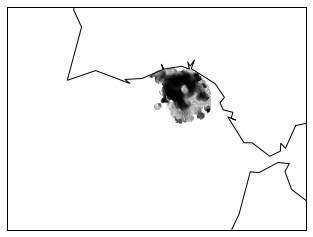

In [6]:
longrid, latgrid = np.meshgrid(lon, lat)
longrid2, latgrid2 = m(longrid, latgrid)
m.quiver(longrid2, latgrid2, u, v)
m.drawcoastlines()
plt.show()

We obtain something not very easy to visualise, we now have to improve the visual aspect.

# Final plot

Let's combine all the elements of the previous sections to create a nice plot.

First create the same projection, but with a better resolution for the coastline and land mask.

In [7]:
m = Basemap(projection='merc', llcrnrlat=36.4, urcrnrlat=37.25,\
            llcrnrlon=-7.75, urcrnrlon=-6.5, lat_ts=35., resolution='h')

Compute the coordinates in this new projection system.

In [8]:
longrid2, latgrid2 = m(longrid, latgrid)

Compute the velocity norm, to have a color depending on the current.

In [9]:
uvnorm = (u*u + v*v)**0.5

Create a colormap for the velocity norm.

In [10]:
cmap = plt.cm.Oranges

Create the plot, with a reference vector (function [quiverkey](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.quiverkey)).

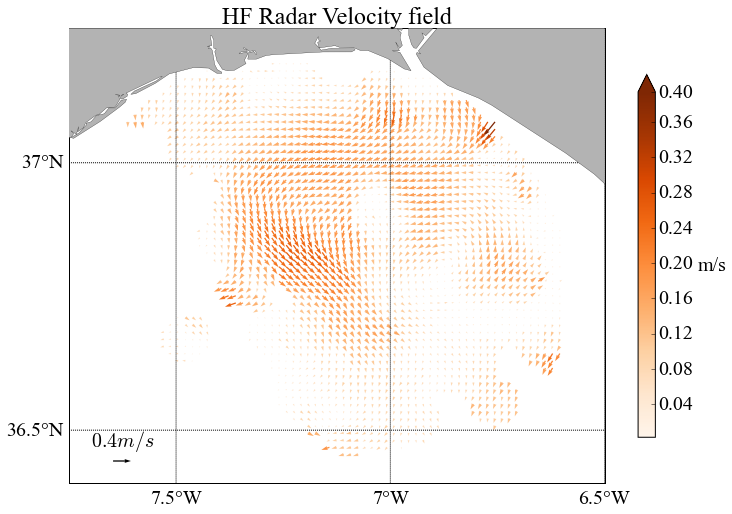

In [11]:
plt.figure(figsize=(12,10))
m.drawcoastlines(linewidth=.25, zorder=4)
m.fillcontinents(color='.7', zorder=3)
Q = m.quiver(longrid2, latgrid2, u, v, uvnorm, cmap=cmap, scale=12)
qk = plt.quiverkey(Q, 0.1, 0.05, 0.4, r'$0.4 m/s$',
                   fontproperties={'weight': 'bold'})
m.drawparallels(np.arange(30.,40.,.5), labels=[True,False,True,False], zorder=2)
m.drawmeridians(np.arange(-10.,2.,.5), labels=[False,True,False,True], zorder=2)
cbar = plt.colorbar(extend='max', shrink=0.65)
cbar.set_label('m/s', rotation=0, horizontalalignment='left')

plt.title('HF Radar Velocity field', fontsize=24)
plt.savefig('../../figures/radar_pde.png', dpi=300)

plt.show()

**Note:** it's always better to start the tests with a low resolution for the projection, in order to reduce the computation time.